# TSDN 2023

# 1. Informasi Dataset

---
Dataset yang digunakan dalam analisis ini adalah data sekunder yang kami peroleh dari beberapa sumber terbuk (open source). Dataset ini dapat dilihat pada link gdrive berikut
https://drive.google.com/drive/folders/1GaS1qP8Xe9IIe7WGpAvZU7Gz1Ml7-7FR?usp=drive_link


Berikut rincian dataset yang digunakan

1. Sensitive (1000 Data)

- SIM (200) https://universe.roboflow.com/florida-international-university-vc1lq/driver-licenses/dataset/3
- KTP (400) https://universe.roboflow.com/zapps-indonesia-frkib/ktp-8s12v/dataset/3
- KK (400) google.com
2. Non Sensitive (1000 Data)
- Animals: https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals
- Food: https://www.kaggle.com/datasets/trolukovich/food11-image-dataset
- Human Activity: https://www.kaggle.com/datasets/meetnagadia/human-action-recognition-har-dataset

# 2. Import Package

In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import splitfolders
import seaborn as sns
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from pathlib import Path
import pandas as pd

# 3. Directory List

#### Split dataset menjadi 3 bagian yaitu train, validation, dan test dengan perbadingan 70% : 20 % : 10 %

In [2]:
# Directory Utama
main_path = './Dataset'

#### Split folder dijalankan sekali

In [4]:
splitfolders.ratio(
    main_path,
    output='dataset',
    ratio=(0.7, 0.2, 0.1)
)

Copying files: 2000 files [00:11, 178.75 files/s]


In [3]:
# Directory List
train_path = './Dataset/train'
val_path = './Dataset/val'
test_path = './Dataset/test'

# 4. Preprocessing Data

### Proses Augmentasi pada Gambar
---
> Pada Data Train 
- Rescale
- Rotation
- Scaling 
- Zoom in / Zoom out 
- fillm_mode
- Horizontal Flip
- Vertical Flip
---
> Pada Data Validation dan Testing
- Rescale
---

### Membagi direktori utama(main_path) menjadi 3 dengan variabel **train_set**, **val_set** dan **test_set**
> Pada Data Training, Validaiton dan Testing

- Mengubah resolusi gambar menjadi 128x128.
- Batch_size 32 yang mana dalam satu step ada 32 sampel gambar yang dimasukkan dalam step training atau validation.

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=30, 
                                    shear_range=0.2, 
                                    zoom_range=(0.5,1.0), 
                                    fill_mode='nearest', 
                                    horizontal_flip=True,
                                    vertical_flip=True,)

train_set = train_datagen.flow_from_directory(train_path,
                                                batch_size=32,
                                                target_size=(128, 128),
                                                class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)

val_set = val_datagen.flow_from_directory(val_path,
                                            batch_size=32,
                                            target_size=(128, 128),
                                            class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(test_path,                                          
                                                batch_size=32,
                                                target_size=(128, 128),
                                                class_mode='categorical')

Found 1400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### Membuat List Kelas Yang Ada

In [5]:
# List Nama Kelas
class_names = ['Non Sensitive', 'Sensitive']
class_names

['Non Sensitive', 'Sensitive']

# 5. Data Analisis dan Visualisasi

### Meta Data

In [6]:
# List untuk mengisi nama kelas dan jumlah data dari masing2 label
file_name = []
tag = []
full_path = []

for path, subdirs, files in os.walk(main_path):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)
        
print("Nama Dataset      : Sensitive Data VS Non Sensitive Data")
print("Ukuran Gambar     : [128, 128, 4]")
print("Kelas             :",class_names)
print(f"Total Data       : [{len(tag)}]")
print("====================================")
print("Jumlah Gambar     :")
df = pd.DataFrame({"path":full_path,'file_name':file_name,"Nama":tag})
df.groupby(['Nama']).size()

Nama Dataset      : Sensitive Data VS Non Sensitive Data
Ukuran Gambar     : [128, 128, 4]
Kelas             : ['Non Sensitive', 'Sensitive']
Total Data       : [4001]
Jumlah Gambar     :


Nama
Dataset                           1
Dataset\Non Sensitive          1000
Dataset\Sensitive              1000
Dataset\test\Non Sensitive      100
Dataset\test\Sensitive          100
Dataset\train\Non Sensitive     700
Dataset\train\Sensitive         700
Dataset\val\Non Sensitive       200
Dataset\val\Sensitive           200
dtype: int64

In [7]:
file_name = []
TR = []
full_path = []

for path, subdirs, files in os.walk(train_path):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        TR.append(path.split('/')[-1])        
        file_name.append(name)
        
df = pd.DataFrame({"path":full_path,'file_name':file_name,"Train":TR})
df.groupby(['Train']).size()

Train
train\Non Sensitive    700
train\Sensitive        700
dtype: int64

In [8]:
file_name = []
VL = []
full_path = []

for path, subdirs, files in os.walk(val_path):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        VL.append(path.split('/')[-1])        
        file_name.append(name)
        
df = pd.DataFrame({"path":full_path,'file_name':file_name,"Validation":VL})
df.groupby(['Validation']).size()

Validation
val\Non Sensitive    200
val\Sensitive        200
dtype: int64

In [9]:
file_name = []
TS = []
full_path = []

for path, subdirs, files in os.walk(test_path):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        TS.append(path.split('/')[-1])        
        file_name.append(name)
        
df = pd.DataFrame({"path":full_path,'file_name':file_name,"Test":TS})
df.groupby(['Test']).size()

Test
test\Non Sensitive    100
test\Sensitive        100
dtype: int64

## Visualisasi Data

#### Visualisasi Data setelah teraugmentasi

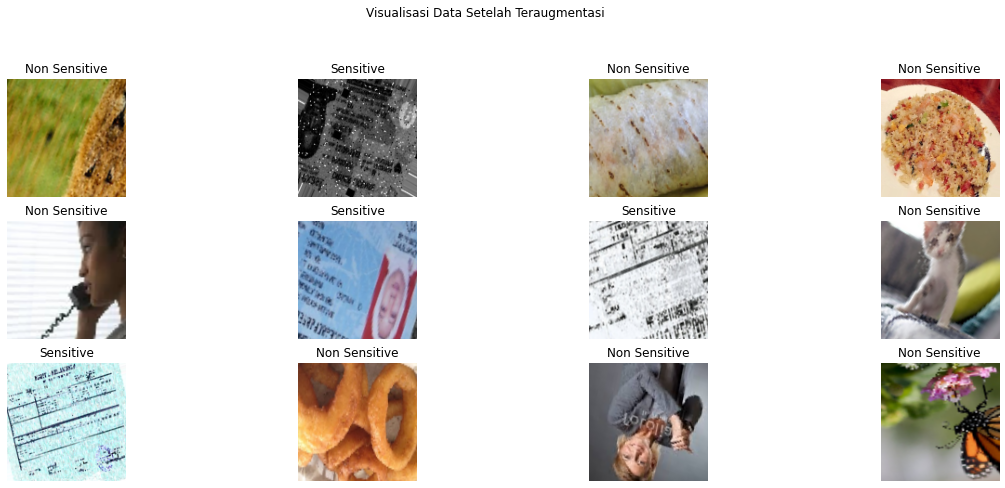

In [10]:
plt.figure(figsize=(20, 10))
plt.suptitle('Visualisasi Data Setelah Teraugmentasi')
images, labels = train_set.next()

for i in range(12):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis("off")
    
plt.show()

#### Visualisasi Data Dengan Melihat Ukuran Gambarnya

Ukuran gambar : (128, 128, 3)


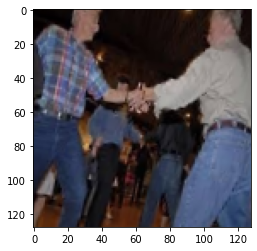

Ukuran gambar : (128, 128, 3)


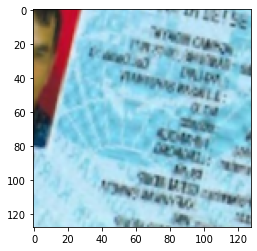

Ukuran gambar : (128, 128, 3)


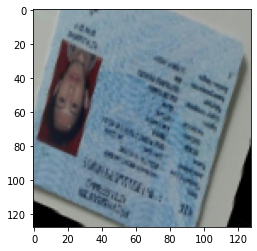

Ukuran gambar : (128, 128, 3)


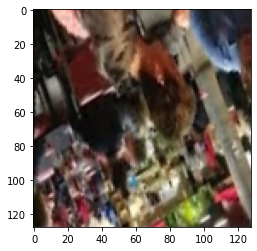

In [11]:
for i in range(4):
    img, label = train_set.next()
    print("Ukuran gambar :",img[i].shape)
    plt.imshow(img[i])
    plt.show()

#### Mengkonversi Dataset menjadi DataFrame Untuk Visualisasi Pie Chart

In [12]:
paths_train = [path.parts[-2:] for path in
        Path(train_path).rglob('*.*')] #*.* agar semua format gambar bisa diambil

df_trainpath = pd.DataFrame(data=paths_train, columns=['Class', 'Image']) #membuat nama koloom utk dataframe
df_trainpath = df_trainpath.sort_values('Class', ascending=True) #sorting nama Class
df_trainpath.reset_index(drop=True, inplace=True) #sorting indeks setiap baris
df_trainpath       

,Class,Image
0,Non Sensitive,non (1).jpg
1,Non Sensitive,non (682).jpg
2,Non Sensitive,non (686).jpg
3,Non Sensitive,non (689).jpg
4,Non Sensitive,non (690).jpg
...,...,...
1395,Sensitive,kk (384).jpg
1396,Sensitive,kk (385).jpg
1397,Sensitive,kk (387).jpg
1398,Sensitive,kk (375).jpg


In [13]:
paths_val = [path.parts[-2:] for path in
        Path(val_path).rglob('*.*')] #*.* agar semua format gambar bisa diambil

df_valpath = pd.DataFrame(data=paths_val, columns=['Class', 'Image']) #membuat nama koloom utk dataframe
df_valpath = df_valpath.sort_values('Class', ascending=True) #sorting nama Class
df_valpath.reset_index(drop=True, inplace=True) #sorting indeks setiap baris
df_valpath       

,Class,Image
0,Non Sensitive,non (100).jpg
1,Non Sensitive,non (674).jpg
2,Non Sensitive,non (679).jpg
3,Non Sensitive,non (681).jpg
4,Non Sensitive,non (683).jpg
...,...,...
395,Sensitive,kk (63).jpg
396,Sensitive,kk (67).jpg
397,Sensitive,kk (7).jpg
398,Sensitive,kk (388).jpg


In [14]:
paths_test = [path.parts[-2:] for path in
        Path(test_path).rglob('*.*')] #*.* agar semua format gambar bisa diambil

df_testpath = pd.DataFrame(data=paths_test, columns=['Class', 'Image']) #membuat nama koloom utk dataframe
df_testpath = df_testpath.sort_values('Class', ascending=True) #sorting nama Class
df_testpath.reset_index(drop=True, inplace=True) #sorting indeks setiap baris
df_testpath      

,Class,Image
0,Non Sensitive,non (109).jpg
1,Non Sensitive,non (811).jpg
2,Non Sensitive,non (80).jpg
3,Non Sensitive,non (79).jpg
4,Non Sensitive,non (779).jpg
...,...,...
195,Sensitive,kk (70).jpg
196,Sensitive,kk (64).jpg
197,Sensitive,kk (46).jpg
198,Sensitive,ktp (130).jpg


#### Visualisasi Pie Chart

In [15]:
train_pie = df_trainpath['Class'].value_counts().rename_axis("Class").reset_index(name="Image")
test_pie = df_testpath['Class'].value_counts().rename_axis("Class").reset_index(name="Image")
val_pie = df_valpath['Class'].value_counts().rename_axis("Class").reset_index(name="Image")

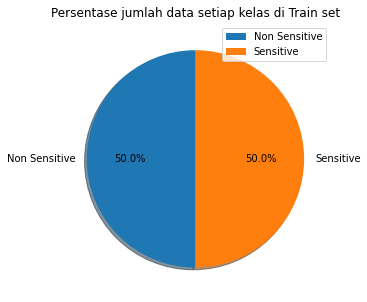

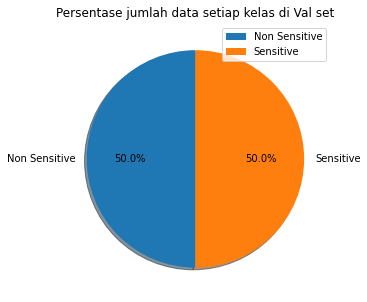

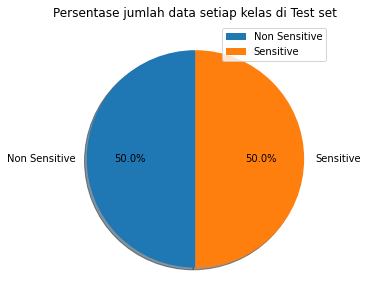

In [16]:
plt.figure(figsize=(10,5))
plt.pie(
    train_pie['Image'],
    labels=train_pie['Class'],
    startangle=90,
    autopct='%.1f%%',
    shadow=True
)
plt.title("Persentase jumlah data setiap kelas di Train set")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.pie(
    val_pie['Image'],
    labels=val_pie['Class'],
    startangle=90,
    autopct='%.1f%%',
    shadow=True
)
plt.title("Persentase jumlah data setiap kelas di Val set")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.pie(
    test_pie['Image'],
    labels=test_pie['Class'],
    startangle=90,
    autopct='%.1f%%',
    shadow=True
)
plt.title("Persentase jumlah data setiap kelas di Test set")
plt.legend()
plt.show()

#### Jumlah Data setiap kelas dalam **Training**, **Validation**,  dan **Testing**

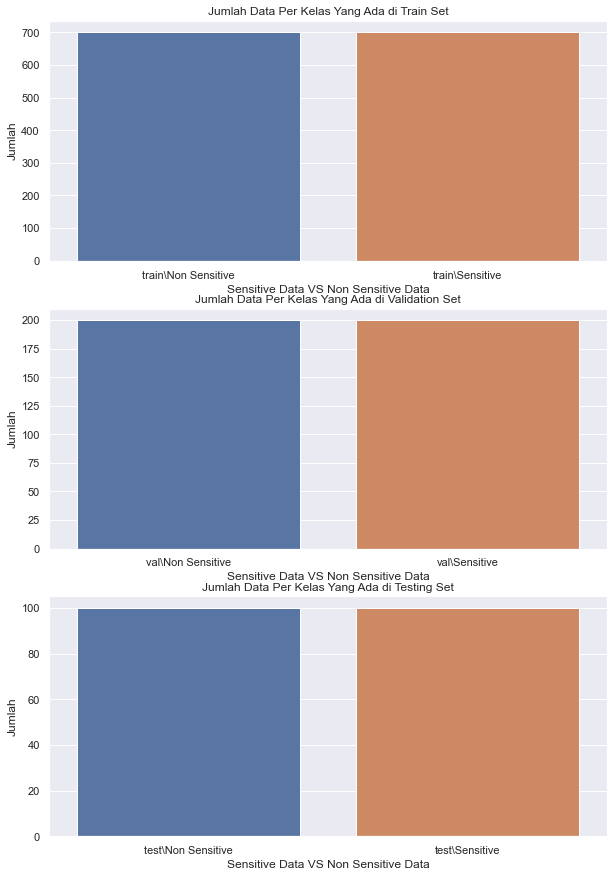

In [17]:
plt.figure(figsize=(10, 15))

sns.set_theme()

plt.subplot(3, 1, 1)
sns.countplot(x=TR)
plt.xlabel('Sensitive Data VS Non Sensitive Data')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Per Kelas Yang Ada di Train Set')

plt.subplot(3, 1, 2)
sns.countplot(x=VL)
plt.xlabel('Sensitive Data VS Non Sensitive Data')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Per Kelas Yang Ada di Validation Set')

plt.subplot(3, 1, 3)
sns.countplot(x=TS)
plt.xlabel('Sensitive Data VS Non Sensitive Data')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Per Kelas Yang Ada di Testing Set')

plt.show()

# 6. Modelling

## Modelling dengan beberapa layer

1. Input layer
    - Convolution filter sebanyak 64, input shape 128x128 3 karena rgb, fungsi aktivasi relu
    - Pooling dengan matrix 2x2

2. Hidden Layer
    - Pooling sebanyak 2 dengan matrix 2x2
    - Convolution filter 16 dan 32 dengan matrix 3x3 dengan aktivasi relu
    - Layer Dropout 0.5
    - Layer Flatten

3. Output Layer    
    - Layer Dense sebanyak 2 filter dan aktivasi softmax

In [18]:
model = tf.keras.Sequential([

#Input layer
tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=[128, 128, 3]),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

#Hidden layer
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Flatten(),
    
#Output layer
tf.keras.layers.Dense(2, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        4

#### Compile model untuk mengatur konfigurasi model
---
- loss menggunakan metode Categorical Crossentropy
- Optimizer menggunakan metode Adam
- Kriteria berdasarkan akurasi
---

In [20]:
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

#### Fungsi untuk menghentikan epoch ketika accuracy sudah mencapai 97% atau validation accuracy sudah mencapai 95%

In [21]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.95):
            self.model.stop_training = True

#### Proses melatih data dari model yang sudah dibuat
---
- Dengan iterasi sebanyak 20
- Mengambil data validation
---

In [22]:
hasil = model.fit(train_set, epochs=20, validation_data=val_set, verbose=1, callbacks=[myCallback()])

Epoch 1/20
44/44 [==============================] - 351s 8s/step - loss: 0.4300 - accuracy: 0.7771 - val_loss: 0.2891 - val_accuracy: 0.8750
Epoch 2/20
10/44 [=====>........................] - ETA: 4:40 - loss: 0.1860 - accuracy: 0.9344

## Evaluasi model
---
#### untuk menguji hasil dari validation menggunakan evaluate
---

In [25]:
# Evaluasi Data Testing
test_evaluate = model.evaluate(test_set, verbose=0)
print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {test_evaluate[1]}')

Test loss     : 0.08867965638637543
Test accuracy : 0.9399999976158142


## Visualisasi perbandingan **Akurasi** dan **Loss** Model


---
#### Visualisasi akurasi dan loss dari fitting
---

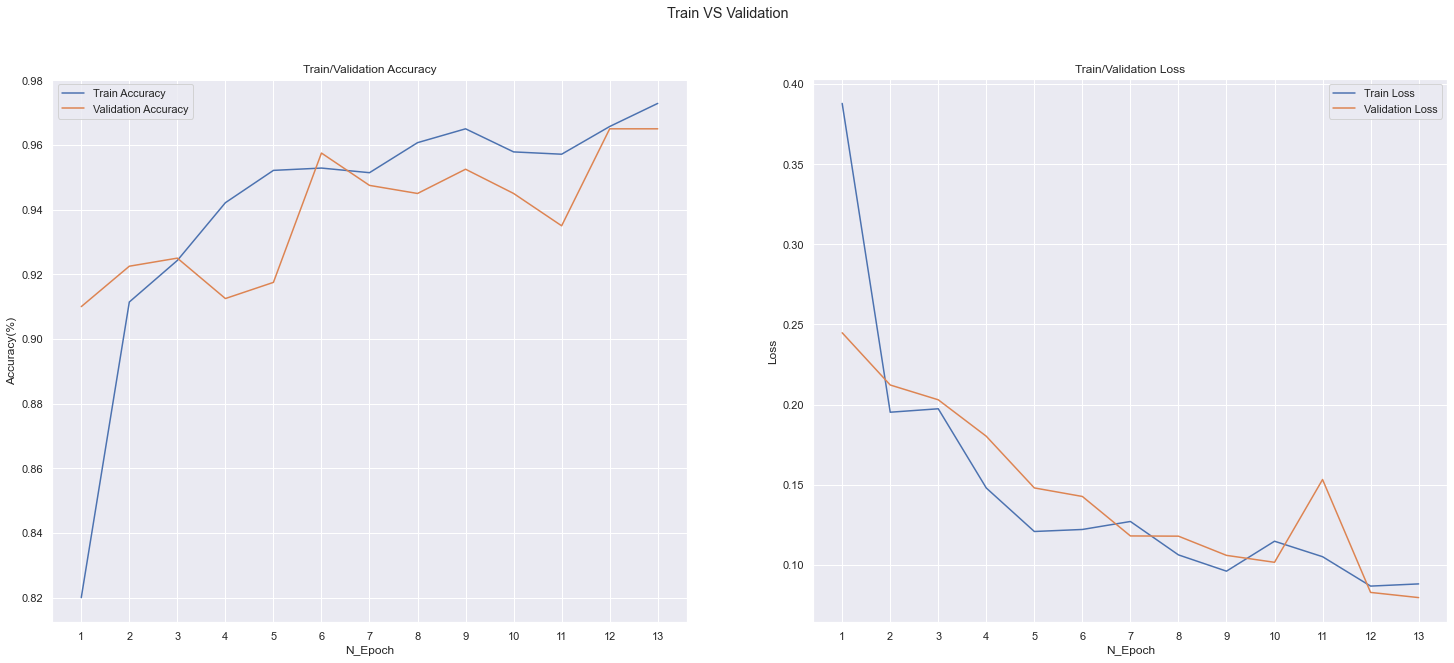

In [26]:
epoch = [i+1 for i in range(13)]

plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()

In [27]:
# Simpan model ke dalam format TensorFlow Lite (TFLite)
model.save('Model_Saved')

INFO:tensorflow:Assets written to: Model_Saved\assets


INFO:tensorflow:Assets written to: Model_Saved\assets


In [28]:
# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('Model_Saved')
tflite_model = converter.convert()

In [29]:
# Simpan model TFLite ke dalam file
with open('Model_Saved.tflite', 'wb') as f:
    f.write(tflite_model)

# 7. Prediksi
### Visualisai Hasil prediksi yang benar

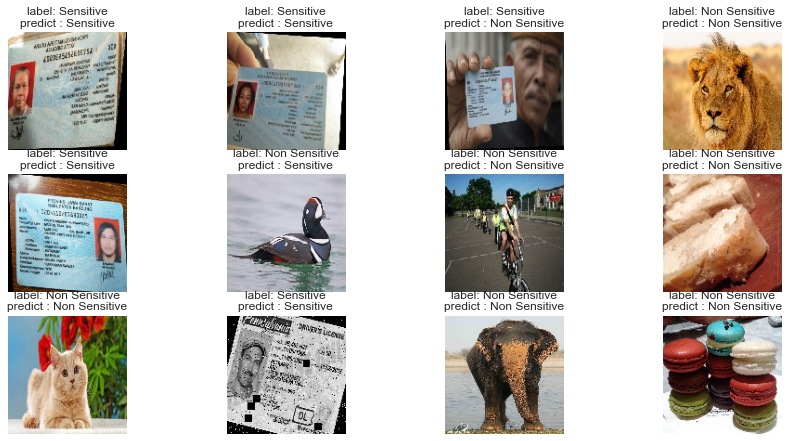

In [30]:
image ,label = next(iter(test_set))

plt.figure(figsize=(15,10))
for i in range(12) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(4,4,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}\npredict : {class_names[y_pred]}')

### Visualisasi Hasil prediksi yang salah

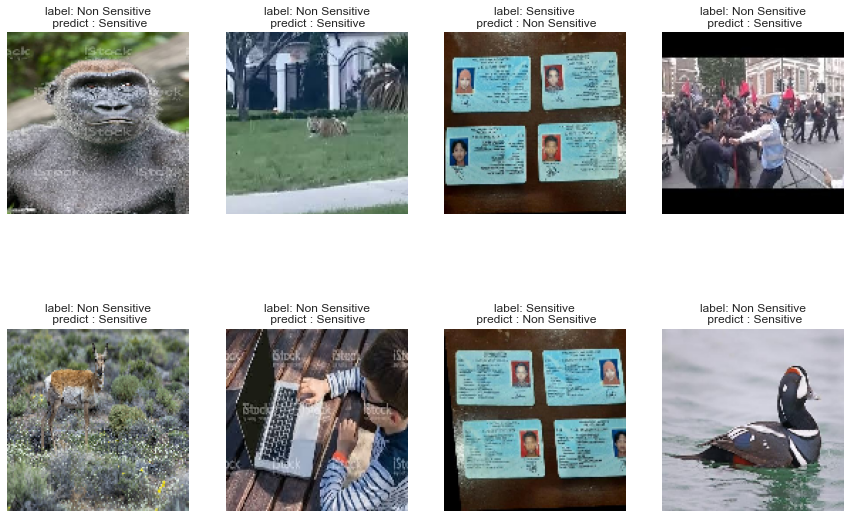

In [33]:
#Plot prediction Error
plt.figure(figsize=(15,10))

Trulabel = []
img = []
pred = []
for i in range(len(test_set)) :
    image,label = test_set.next()
    for j in range(32) :
        if (len(Trulabel) == 8) :
            break
        Aktual = class_names[np.argmax(label[j])]
        y_pred = np.argmax(model.predict(image[j][None,...],verbose=0))
        if (Aktual != class_names[y_pred]) :
            Trulabel.append(Aktual)
            img.append(image[j])
            pred.append(y_pred)

for k in range(8) :
    plt.subplot(2,4,k+1)
    plt.imshow(tf.squeeze(img[k]))
    plt.axis('off')
    plt.title(f'label: {Trulabel[k]}\n predict : {class_names[pred[k]]}')

In [34]:
# Untuk menyimpan hasil testing dan predict dari data testing
y_test = []
y_pred = []

for i in range(len(test_set)) :
    x,y = test_set.next()
    for j in range(len(y)) :
        y_test.append(class_names[tf.argmax(y[j])])
        y_pred.append(class_names[np.argmax(model.predict(x[j][None,...],verbose=0))])

### Confusion Matrix

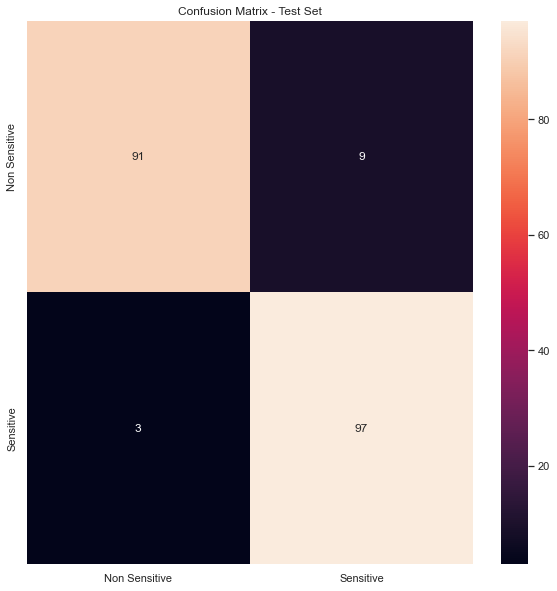

In [35]:
# Visualisasi Heatmap untuk Confusion Matrix

plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion Matrix - Test Set")
plt.show()

### Classification Report

In [36]:
class_names

['Non Sensitive', 'Sensitive']

In [37]:
#Classification Report

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report
               precision    recall  f1-score   support

Non Sensitive       0.97      0.91      0.94       100
    Sensitive       0.92      0.97      0.94       100

     accuracy                           0.94       200
    macro avg       0.94      0.94      0.94       200
 weighted avg       0.94      0.94      0.94       200

